In [1]:
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./sonar.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [9]:
y = data[60]
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [11]:
X = data.drop(60, axis=1).astype(float)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [14]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
first_model = Sequential()
first_model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
first_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
first_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
first_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                3660      
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3721 (14.54 KB)
Trainable params: 3721 (14.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
first_model.fit(X, y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 [==============================] - 1s 10ms/step - loss: 0.6900 - accuracy: 0.5668 - val_loss: 0.6980 - val_accuracy: 0.2857
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.6417 - val_loss: 0.6843 - val_accuracy: 0.6667
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6898 - val_loss: 0.6958 - val_accuracy: 0.3810
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.6898 - val_loss: 0.6916 - val_accuracy: 0.3810
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.7326 - val_loss: 0.6960 - val_accuracy: 0.3810
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.7487 - val_loss: 0.7479 - val_accuracy: 0.2857
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6065 - accuracy: 0.7219 - val_loss: 0.6600 - val_accuracy: 0.6190
Epoch 8/100


In [18]:
second_model = Sequential()
second_model.add(Dense(30, input_dim=60, kernel_initializer='normal', activation='relu'))
second_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
second_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
second_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 30)                1830      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1861 (7.27 KB)
Trainable params: 1861 (7.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
second_model.fit(X, y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 [==============================] - 1s 7ms/step - loss: 0.6942 - accuracy: 0.4385 - val_loss: 0.6874 - val_accuracy: 0.9524
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5829 - val_loss: 0.6934 - val_accuracy: 0.5238
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.6203 - val_loss: 0.6821 - val_accuracy: 1.0000
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.6578 - val_loss: 0.7047 - val_accuracy: 0.1429
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.6898 - val_loss: 0.6914 - val_accuracy: 0.4762
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.7433 - val_loss: 0.7138 - val_accuracy: 0.1905
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.7166 - val_loss: 0.7081 - val_accuracy: 0.3333
Epoch 8/100
1

In [20]:
third_model = Sequential()
third_model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
third_model.add(Dense(15, kernel_initializer='normal', activation='relu'))
third_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
third_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
third_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 60)                3660      
                                                                 
 dense_5 (Dense)             (None, 15)                915       
                                                                 
 dense_6 (Dense)             (None, 1)                 16        
                                                                 
Total params: 4591 (17.93 KB)
Trainable params: 4591 (17.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
third_model.fit(X, y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 [==============================] - 1s 7ms/step - loss: 0.6928 - accuracy: 0.4759 - val_loss: 0.6902 - val_accuracy: 1.0000
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.6684 - val_loss: 0.6985 - val_accuracy: 0.0000e+00
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.6738 - val_loss: 0.7062 - val_accuracy: 0.0000e+00
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.7005 - val_loss: 0.7124 - val_accuracy: 0.1429
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6845 - val_loss: 0.7546 - val_accuracy: 0.0000e+00
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.7326 - val_loss: 0.7262 - val_accuracy: 0.3333
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.7219 - val_loss: 0.7322 - val_accuracy: 0.3810
E

<Figure size 640x480 with 0 Axes>

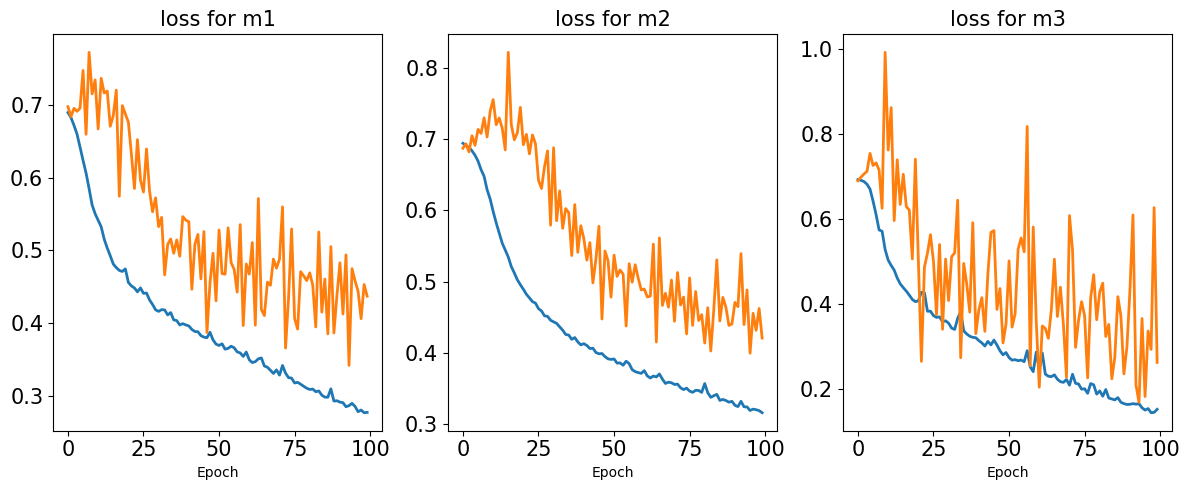

In [22]:
plt.figure()

m1 = first_model.history

fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(1, 3, 1)
ax.plot(m1.history['loss'], lw=2)
ax.plot(m1.history['val_loss'], lw=2)
ax.set_title('loss for m1', size=15)
ax.set_xlabel('Epoch', size=10)
ax.tick_params(axis='both', which='major', labelsize=15)


m2 = second_model.history

ax = fig.add_subplot(1, 3, 2)
ax.plot(m2.history['loss'], lw=2)
ax.plot(m2.history['val_loss'], lw=2)
ax.set_title('loss for m2', size=15)
ax.set_xlabel('Epoch', size=10)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

m3 = third_model.history

ax = fig.add_subplot(1, 3, 3)
ax.plot(m3.history['loss'], lw=2)
ax.plot(m3.history['val_loss'], lw=2)
ax.set_title('loss for m3', size=15)
ax.set_xlabel('Epoch', size=10)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

plt.show()

<Figure size 640x480 with 0 Axes>

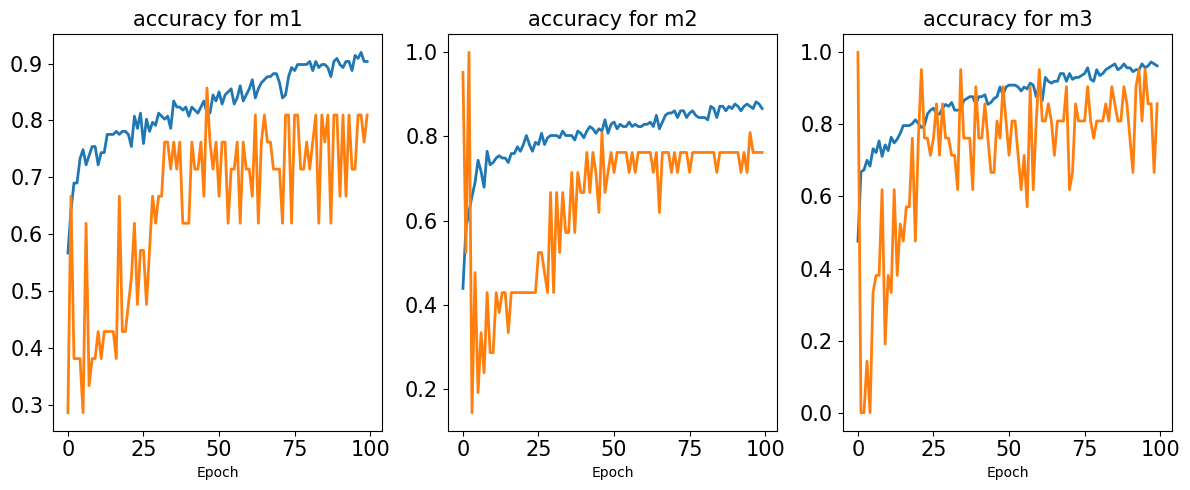

In [23]:
plt.figure()

m1 = first_model.history

fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(1, 3, 1)
ax.plot(m1.history['accuracy'], lw=2)
ax.plot(m1.history['val_accuracy'], lw=2)
ax.set_title('accuracy for m1', size=15)
ax.set_xlabel('Epoch', size=10)
ax.tick_params(axis='both', which='major', labelsize=15)


m2 = second_model.history

ax = fig.add_subplot(1, 3, 2)
ax.plot(m2.history['accuracy'], lw=2)
ax.plot(m2.history['val_accuracy'], lw=2)
ax.set_title('accuracy for m2', size=15)
ax.set_xlabel('Epoch', size=10)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

m3 = third_model.history

ax = fig.add_subplot(1, 3, 3)
ax.plot(m3.history['accuracy'], lw=2)
ax.plot(m3.history['val_accuracy'], lw=2)
ax.set_title('accuracy for m3', size=15)
ax.set_xlabel('Epoch', size=10)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

plt.show()

Таким образом, первая модель имеет: loss - 0,2770, accuracy - 0,9037, val_accuracy - 0,8095
вторая модель имеет: loss - 0,3156, accuracy - 0,8663, val_accuracy - 0,7619
третья модель имеет: loss - 0,1526, accuracy - 0,9626, val_accuracy - 0,8571
Третья модель с дополнительным скрытым слоем показала наилучший результат